# 1. This is Dr. Ignaz Semmelweis discover of handwashing
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Ignaz_Semmelweis_1860.jpg/220px-Ignaz_Semmelweis_1860.jpg"></p>

<p>Dr Ignaz is was a Hungarian physician and scientist, now known as an early pioneer of antiseptic procedures. Described as the "saviour of mothers", Semmelweis discovered that the incidence of puerperal fever (also known as "childbed fever") could be drastically cut by the use of hand disinfection in obstetrical clinics. Puerperal fever was common in mid-19th-century hospitals and often fatal.<em>childbed fever</em>: A deadly disease affecting women that just have given birth. In the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. Dr Ignaz believed the cause of childbed fever was the contaminated hands of the doctors delivering the babies.</p>
<p>In this notebook, I want to reanalyze the data that made Semmelweis discover the importance of <em>handwashing</em>. As we all know covid19 is the hot health issue around the world currently. I would like to use this analysis to emphazie the importance of washing your hands. Understand that a simple act of washing your hands could be the line between life and death. Dr Ignaz was nice enough to help us with some data to back up his claim and we will analyze Dr Ignaz's data to help him prove he was right.</p> If you are interested in learning more about the good Dr kindly follow this wikipedia <a href="https://en.wikipedia.org/wiki/Ignaz_Semmelweis">link</a>

In [9]:
#The first thing i will do is to import all the modules a.k. random stuffs to perform the analysis
import pandas as pd
import numpy as np
import seaborn as sns
#importing the yearly data observed by the DR
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

In [13]:
#exploratory analysis
print(yearly)
yearly.describe()

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


# What can we observe from this data?
1) The Doctor gathered data from two clinics and we can see clinic 1 and clinic 2 specifying the data for each clinic.<br/>
2)The highest number of death was recorded in the year 1846 at clinic 1<br/>
3)If we simply eyeball the data we can notice how clinic 2 has a lower death rate compared to clinic 1, but lets take a deep dive and validate this.


In [46]:
#lets get the percentage rate of death to births

yearly['death rate'] = yearly.deaths/yearly.births

#for every 100 births around 8 of them died in 1841(scary)
#lets break down the data into their respective clinics

clinic1 = yearly[yearly['clinic']=='clinic 1']
clinic2 = yearly[yearly['clinic']=='clinic 2']

clinic1

,year,births,deaths,clinic,death rate
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [47]:
#view clinic 2
clinic2

,year,births,deaths,clinic,death rate
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


# Average yearly date for each clinics
We want to see the average deaths yearly for this clinics over 6 years

In [65]:
#lets get the average death for the differnet clinics
average_death1 = np.mean(clinic1.deaths)
average_death2 = np.mean(clinic2.deaths)

print('the average yearly death for clinic 1 is ' + str( int(average_death1)))
print('the average yearly death for clinic 2 is ' + str( int(average_death2)) )

the average yearly death for clinic 1 is 331
the average yearly death for clinic 2 is 115


Text(0, 0.5, 'death rate')

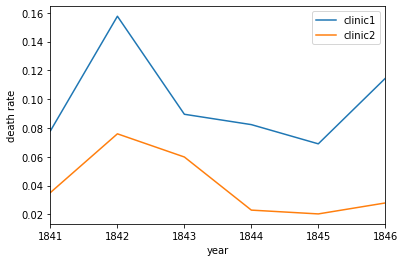

In [73]:
#let us plot this to get a better view
%matplotlib inline
ax = clinic1.plot(x="year", y="death rate",
              label="clinic1")
clinic2.plot(x="year", y="death rate",
         label="clinic2", ax=ax)
ax.set_ylabel("death rate")

# Explanation for the low death rate in clinic 2
the difference between the two clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. Dr Ignaz suspected that something on the corpses, spread from the hands of the medical students, caused childbed fever. So he suggested people start Washing their hands! But like we are all doing right now no one listened to the Dr.<br/>


# let us check out the monthly data gathered by Dr Ignaz

In [87]:
#loading the monthly data showing monthly death rates and birth
monthly = pd.read_csv('datasets/monthly_deaths.csv', 
    parse_dates=["date"])

monthly.head(10)

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
5,1841-06-01,200,10
6,1841-07-01,190,16
7,1841-08-01,222,3
8,1841-09-01,213,4
9,1841-10-01,236,26


In [88]:
#let us get death rate for monthly
monthly['death rate'] = monthly.deaths/monthly.births
monthly

,date,births,deaths,death rate
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


Text(0, 0.5, 'death rate')

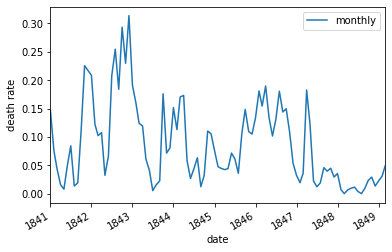

In [89]:
#let us plot this to get a better view
%matplotlib inline
ax = monthly.plot(x="date", y="death rate",
              label="monthly")
ax.set_ylabel("death rate")

# Effect of handwashing
We can see around mid year 1847 the death rate reduced and this was due to the implementation of the hand washing rule


# Segment plot into before and after handwashing
Let us break the plot into two so we can visualize the effects of handwashing better.<br/>
Handwashing started mid year 1847, lets segment our data

Text(0, 0.5, 'death rate')

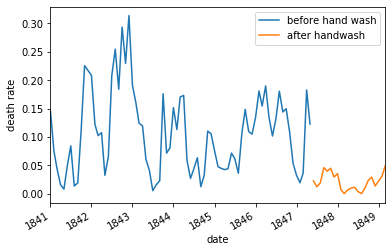

In [99]:
monthly.head(10)
handwashing_start = pd.to_datetime('1847-06-01')
before_handwash = monthly[monthly['date'] < handwashing_start]
After_handwash = monthly[monthly['date'] >= handwashing_start]

ax = before_handwash.plot(x="date", y="death rate",
              label="before hand wash")
After_handwash.plot(x="date", y="death rate",
         label="after handwash", ax=ax)
ax.set_ylabel("death rate")

In [118]:
#Difference in the deat average before and after handwashing


0.10504998260908793

In [137]:
before_proportion = before_handwash['death rate']
after_proportion = After_handwash['death rate']
mean_diff = np.mean(after_proportion) - np.mean(before_proportion)
mean_diff

-0.0839566075118334

# A Bootstrap analysis
for inference problems like this result of a single measurement might not really prove our point so lets get a more general reperesentaion by simulating data. 

In [140]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025,0.975])
confidence_interval

0.025   -0.100444
0.975   -0.067420
dtype: float64

# This shows that  handwashing reduces the proportion of deaths by between 6.7 and 10 percentage points